In [6]:
import os
from scipy import misc
from matplotlib import pyplot as plt
import numpy as np
import numpy.ma as ma
%matplotlib inline

0
owl_data_training_set_bak/mask/1479694213.mask.0.png
1
owl_data_training_set_bak/mask/1479694213.mask.1.png
2
owl_data_training_set_bak/mask/1479694213.mask.2.png
3
owl_data_training_set_bak/mask/1479694213.mask.3.png
4
owl_data_training_set_bak/mask/1479694213.mask.4.png
0
owl_data_training_set_bak/mask/1479694547.mask.0.png
1
owl_data_training_set_bak/mask/1479694547.mask.1.png
2
owl_data_training_set_bak/mask/1479694547.mask.2.png
3
owl_data_training_set_bak/mask/1479694547.mask.3.png
4
owl_data_training_set_bak/mask/1479694547.mask.4.png
0
owl_data_training_set_bak/mask/1479694200.mask.0.png
1
owl_data_training_set_bak/mask/1479694200.mask.1.png
2
owl_data_training_set_bak/mask/1479694200.mask.2.png
3
owl_data_training_set_bak/mask/1479694200.mask.3.png
4
owl_data_training_set_bak/mask/1479694200.mask.4.png
0
owl_data_training_set_bak/mask/1479694148.mask.0.png
1
owl_data_training_set_bak/mask/1479694148.mask.1.png
2
owl_data_training_set_bak/mask/1479694148.mask.2.png
3
owl_data

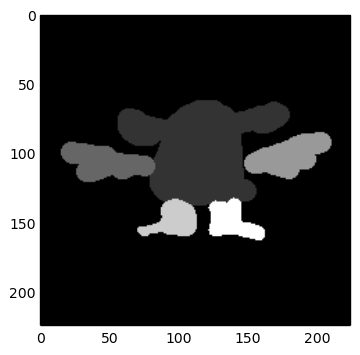

In [58]:
data_dir = 'owl_data_training_set_bak/'
label_map = [2, 3, 3, 3, 3, 4, 5, 6, 7]
for (dirpath, dirnames, filenames) in os.walk(data_dir + 'images'):
    for filename in filenames:
        img = misc.imread(data_dir + 'images/' + filename, mode='L')
        label_data = np.ones(img.shape, dtype='byte')
        for label_idx in range(5):
            print(label_idx)
            label = label_idx + 2
            mask_name = data_dir + 'mask/' + filename.replace('.png', '.mask.' + str(label_idx) + '.png')
            print(mask_name)
            cur_label_img = misc.imread(mask_name, mode='L')
            cur_label_img = np.minimum(cur_label_img, np.ones(cur_label_img.shape))
#             plt.imshow(cur_label_img, cmap='gray')
            label_data_mx = ma.masked_array(label_data, mask=cur_label_img)
            ma.set_fill_value(label_data_mx, label)
            label_data = label_data_mx.filled()
        plt.imshow(label_data, cmap='gray')
        # save labeled image
        misc.imsave(data_dir + 'label_images/' + filename, label_data)
        # save to dat file
        label_filename = data_dir + 'labels/' + filename.replace('.png', '.dat')
        label_file = open(label_filename, "wb")
        byte_data = bytearray(label_data)
        label_file.write(byte_data)
        label_file.close()

In [57]:
np.min(label_data)

1

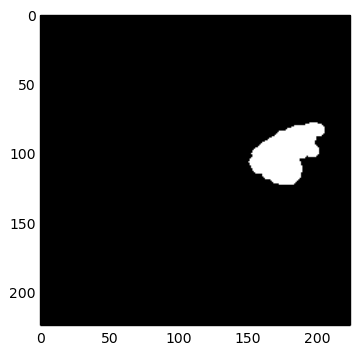

In [50]:
plt.imshow(cur_label_img, cmap='gray')

In [49]:
cur_label_img = np.minimum(cur_label_img, np.ones(cur_label_img.shape))